In [1]:
%pylab inline
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

import tinygraph as tg

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import io

def from_np_adj(A):
    g = tg.TinyGraph(A.shape[0], A.dtype)
    for i in range(A.shape[0]):
        for j in range(i+1, A.shape[1]):
            g[i, j] = A[i, j]
    return g


np.random.seed(0)

out = []
for N in [8, 16, 32, 64, 128]:
    for ET in [1, 4]:
        for frac in [0.01, 0.05, 0.1, 0.2]:

            for dt in [np.int32, np.uint8]:
                for i in range(30):


                    A = np.zeros((N, N), dtype=dt)
                    idx = np.random.rand(N, N) <= frac
                    idx = np.triu(idx, k=1)
                    b = A.reshape(-1)
                    b[idx.flatten()]= np.random.randint(1, ET+1, size=np.sum(idx))
                    
                    g = from_np_adj(A)
                    
                    t1 = time.time()
                    b = io.BytesIO()
                    tg.io.to_binary(g, b)                    
                    t2 = time.time()
                    s = b.getvalue()
                    bin_bytes = len(s)
                    bin_save_time = t2-t1
                    
                    t1 = time.time()
                    tg.io.from_binary(io.BytesIO(s))
                    t2 = time.time()
                    bin_load_time = t2-t1
                    
                    res = {'N' : N, 
                           'ET' : ET, 
                           'dtype' : str(dt), 
                           'nz' : np.sum(idx), 
                           'frac' : frac, 
                           'occ_pct' : np.sum(idx) / (N*N/2)*100, 
                           'bin_bytes' : bin_bytes, 
                           'bin_save_time_ms' : bin_save_time*1000, 
                           'bin_load_time_ms' : bin_load_time*1000
                           
                          }

                    out.append(res)
df = pd.DataFrame(out)

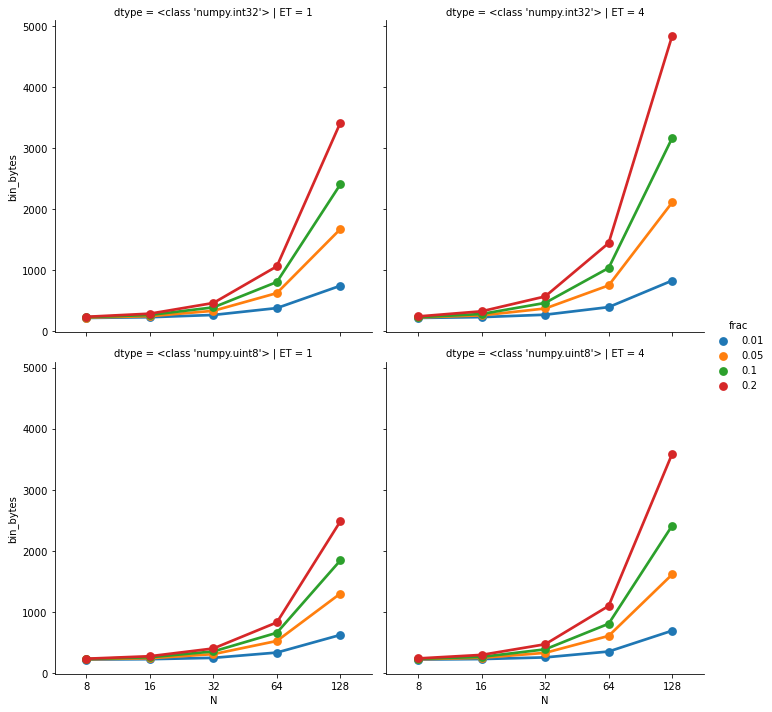

In [3]:
sns.catplot(x='N', y='bin_bytes', hue='frac', row='dtype', col='ET', data=df, kind='point')

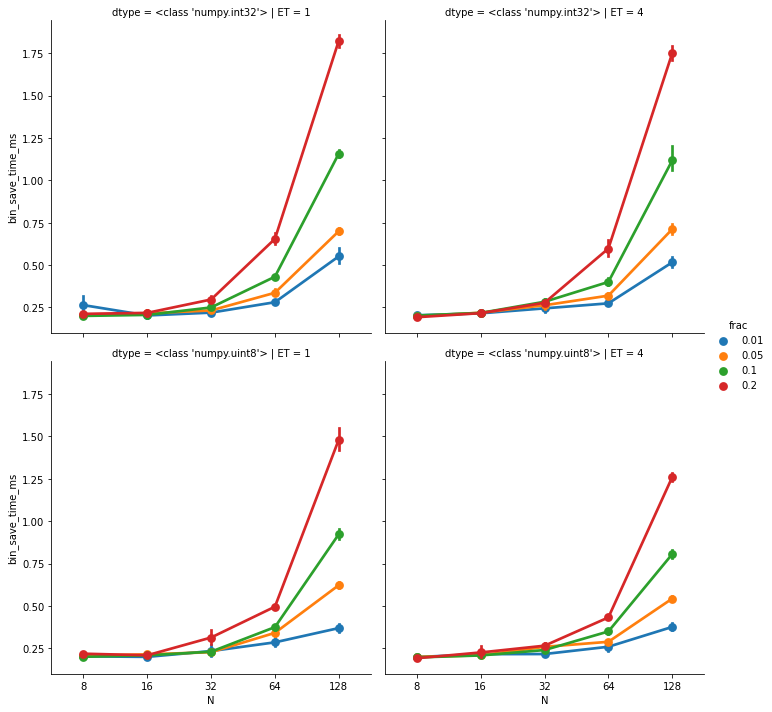

In [4]:
sns.catplot(x='N', y='bin_save_time_ms', hue='frac', row='dtype', col='ET', data=df, kind='point')

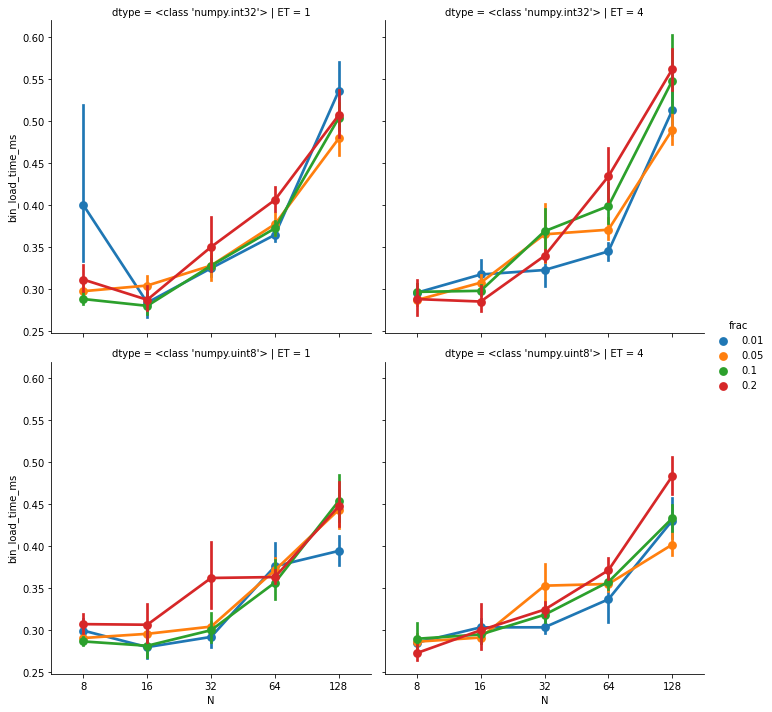

In [5]:
sns.catplot(x='N', y='bin_load_time_ms', hue='frac', row='dtype', col='ET', data=df, kind='point')